##### <h1 id="aa" align="center"> PREDICTION OF BANK CUSTOMER CHURN </h1> 


Description of each variable:
<ul>
<li>Credit_score — credit rating </li>
<li>geography — client country</li>
<li>gender — client gender</li>
<li>age — client age</li>
<li>tenure — number of years spent by the client with the bank </li>
<li>balance — client account balance</li>
<li>num_of_product — number of products that the client purchased from the bank</li>
<li>has_cr_card — the client has a credit card</li>
<li>is-_active_member — active client </li>
<li>estimated_salary — clien salary</li>
<li>exited — client left the bank </li>    
</ul>

In [175]:
%run '../library/utilities.py'

utilities loaded


In [176]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt   #plt.xkcd()
from IPython.display import set_matplotlib_formats
import matplotlib.ticker as mtick

In [212]:
# Improve quality of the plots
set_matplotlib_formats('svg')
# Set the style of the plot
plt.style.use('seaborn-v0_8-white')
#plt.xkcd()

## Load and clean the data

In [ ]:
col_name = ['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 
            'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']

In [ ]:
# Load the data
df = pd.read_csv("Churn Modeling.csv", index_col=False)
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* At least 3 columns do not provide training value : RowNumber, CustomerId and Surname


In [ ]:
# Remove unnecessary variables
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
# Change the columns name
df.columns = col_name
# Show the data
df.head(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* The set contains information about 10,000 bank users

* No empty values found

* There are both nominative and quantitative characteristics

## Statistics and data visualisation

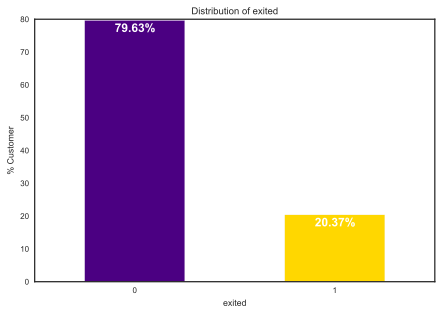

In [219]:
# Plot the distribution of target variable
x = (df["exited"].value_counts(normalize=True)*100).plot(kind = 'bar', 
                                                     color = ['indigo', 'gold'])
x.set_ylabel('% Customer')
x.set_xlabel('exited')
x.set_title('Distribution of exited')
plt.xticks([0, 1], ['0', '1'], rotation=0) 
for i in x.patches:
    x.text(i.get_x()+.15, i.get_height()-3.5, \
            f'{round((i.get_height()), 2)}%',
            fontsize=12,
            color='white',
           weight = 'bold')

[Text(0.5, 1.0, 'Boxplot of age by exited')]

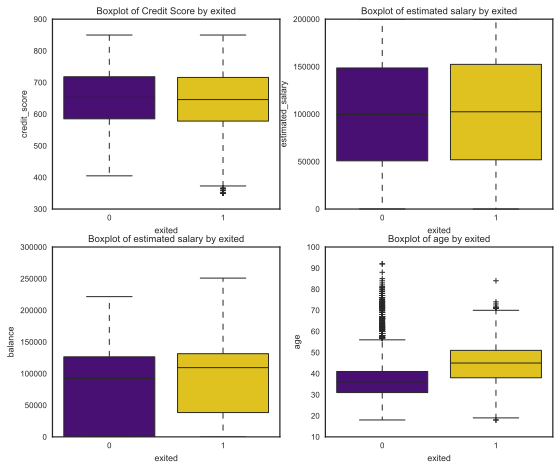

In [218]:
plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
# Boxplot of Credit Score by exited
sns.boxplot(x = df['exited'], y = df['credit_score'], palette=['indigo', 'gold'])\
                                                    .set(title="Boxplot of Credit Score by exited")
# Boxplot of estimated salary by exited
plt.subplot(2, 2, 2)
sns.boxplot(x = df['exited'], y = df['estimated_salary'], palette=['indigo', 'gold'])\
                                                    .set(title="Boxplot of estimated salary by exited")
# Boxplot of balance by exited
plt.subplot(2, 2, 3)
sns.boxplot(x = df['exited'], y = df['balance'], palette=['indigo', 'gold'])\
                                                    .set(title="Boxplot of estimated salary by exited")
# Boxplot of age by exited
plt.subplot(2, 2, 4)
sns.boxplot(x = df['exited'], y = df['age'], palette=['indigo', 'gold'])\
                                                    .set(title="Boxplot of age by exited")

In [ ]:
df.head(5)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


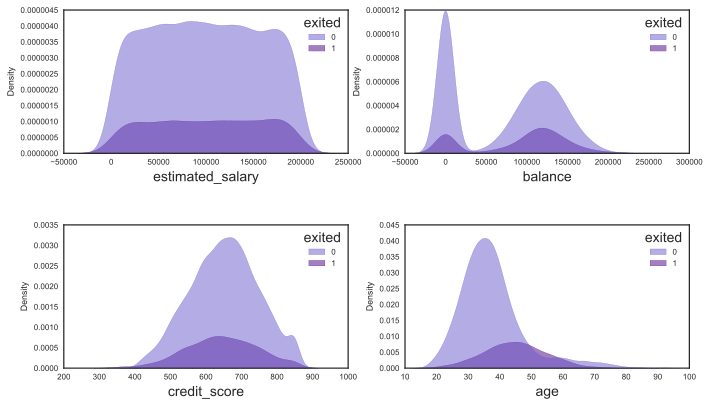

In [251]:
numbCol = ['estimated_salary', 'balance', 'credit_score','age']

fig, axes = plt.subplots(2,2, figsize = (10,6))
plt.subplots_adjust(hspace=0.5)
columns = df[numbCol]
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.5,
                hue = 'exited',
                palette = ['#6A5ACD', '#4B0082'],
                ax = ax)
    ax.set_xlabel(column, fontsize = 14)
plt.show()

* Given the distributions above, we observe that the distribution changes when clients exit or stay.
* We observe a heavy tail in the distributions, which implies higher probabilities for the extreme values.
* Clients over 70 and below 20 have a higher chance of not exiting..

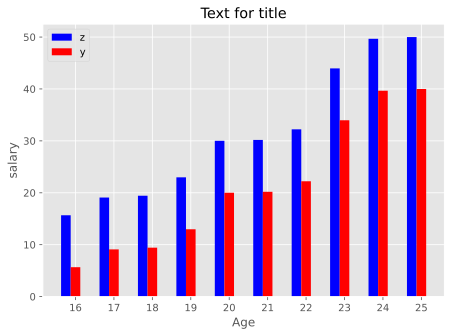

In [ ]:
width = 0.25
plt.bar(x_indexes - width, z, label="z", color = 'blue', width=width)
plt.bar(x_indexes, y, label="y", color = 'red', width=width)
plt.xticks(ticks=x_indexes, labels=x)
plt.title("Text for title")
plt.xlabel("Age")
plt.ylabel("salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()